In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-06 12:27:20.792371: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
8291,-0.012150,-0.032903,266.100000,2491.995719,1031.113303,1032.385986,4.375262,4.390499,93.076403,93.066660,...,53.500000,99.329994,145.099991,52.219997,41.040001,52.239998,20210402T110300Z,20210402T124458.125000Z,6.045154,7.037160
3812,0.009946,-0.040725,325.699998,2486.762542,1002.355768,1003.579007,5.421004,5.432089,90.952000,90.829780,...,105.349998,60.669998,15.929999,51.360001,40.430000,51.329998,20170612T204500Z,20170612T222658.125000Z,-6.122303,-9.317768
2220,-0.098607,-0.048255,292.959996,2465.628629,1012.968245,1014.174503,5.485714,5.685436,62.488897,60.825029,...,56.160000,101.400002,146.589996,37.619999,28.219999,37.610001,20171118T141200Z,20171118T155058.125000Z,5.725120,4.448625
4495,0.547509,0.022966,337.584998,2482.259844,993.137445,994.339005,6.040936,6.061799,86.591240,86.278805,...,73.409996,117.959999,162.399994,59.059998,47.939999,58.859997,20160129T130900Z,20160129T144758.125000Z,5.358885,-13.263199
1173,0.085739,0.094400,357.980002,2471.653475,1017.458491,1018.669986,8.439131,8.454612,95.247900,95.275105,...,54.480000,100.189995,145.770004,48.719997,37.790001,48.719997,20160916T174500Z,20160916T192358.125000Z,1.669808,-3.258454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,272.535001,2491.064483,1016.776770,1018.032996,3.411718,3.462474,73.038053,72.278851,...,49.070000,95.549995,141.940002,63.939999,52.369999,63.719997,20210118T120300Z,20210118T134158.125000Z,6.045154,7.037160
9509,0.065996,-0.026629,273.849998,2476.814342,1011.035600,1012.250504,6.481914,6.540536,83.244302,82.543787,...,55.559998,101.309998,146.940002,46.489998,35.770000,46.469997,20190816T122700Z,20190816T140858.125000Z,4.793102,-5.152116
2283,0.016743,-0.032014,288.435002,2467.407841,1014.254360,1015.478500,3.801912,4.031039,56.148297,53.812369,...,-24.299999,-69.070000,-113.919998,61.529999,50.469997,61.609997,20171207T151500Z,20171207T165358.125000Z,9.488249,-0.378240
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479


In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

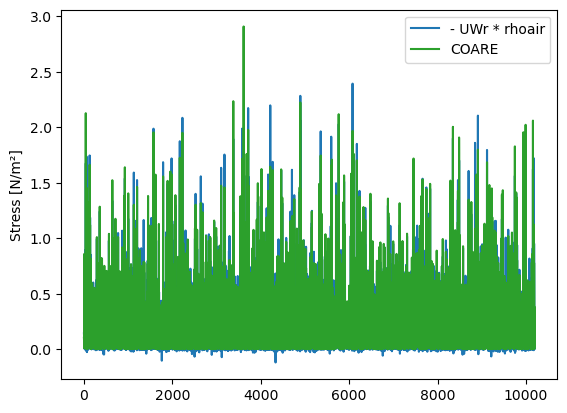

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

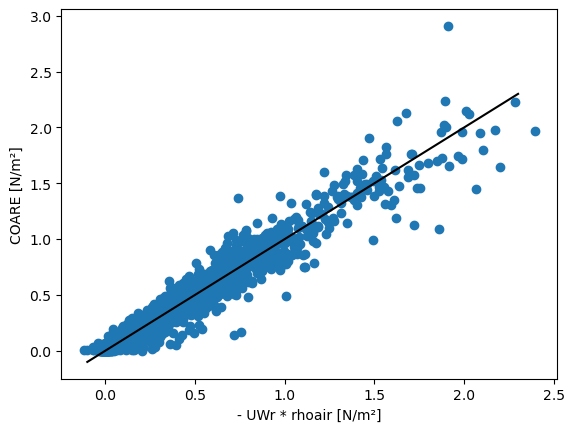

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10200, 67)

In [13]:
df.shape[0]*0.8

8160.0

In [14]:
split_idx = 8160

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft'#,
    #'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft
8291,-21.329966,-20.314684,-20.953699,53.500000,99.329994,145.099991,52.219997,41.040001,52.239998
3812,-20.943676,-13.976841,-16.550650,105.349998,60.669998,15.929999,51.360001,40.430000,51.329998
2220,-13.540611,-10.180238,-18.316372,56.160000,101.400002,146.589996,37.619999,28.219999,37.610001
4495,-20.408886,-14.060665,-14.675045,73.409996,117.959999,162.399994,59.059998,47.939999,58.859997
1173,-18.629818,-16.368279,-17.564482,54.480000,100.189995,145.770004,48.719997,37.790001,48.719997
...,...,...,...,...,...,...,...,...,...
7832,-27.140862,-23.478655,-28.449240,49.070000,95.549995,141.940002,63.939999,52.369999,63.719997
9509,-22.741312,-14.892164,-18.181908,55.559998,101.309998,146.940002,46.489998,35.770000,46.469997
2283,-22.848459,-16.476969,-19.476072,-24.299999,-69.070000,-113.919998,61.529999,50.469997,61.609997
10196,-20.899197,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997


In [17]:
y = np.sqrt(df['u10']**2 + df['v10']**2)

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = np.sqrt(df['UE']**2 + df['UN']**2)

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

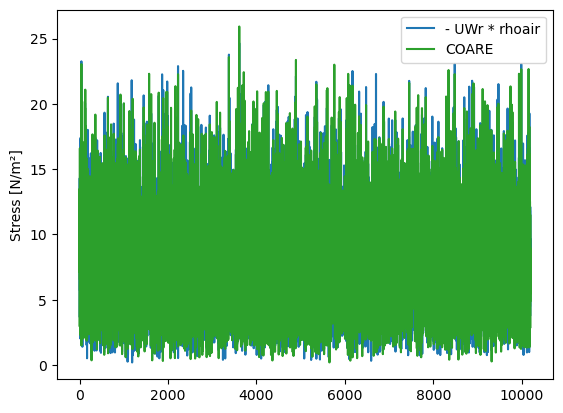

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-06-06 12:27:23.719559: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-06 12:27:23.719877: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-06 12:27:23.719886: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-06 12:27:23.719905: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-gm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-06 12:27:23.720093: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

179/179 [==============================] - 1s 3ms/step - loss: 1.8937 - mean_absolute_error: 1.0252 - val_loss: 1.1347 - val_mean_absolute_error: 0.8283
Epoch 2/500
179/179 [==============================] - 0s 623us/step - loss: 1.5388 - mean_absolute_error: 0.8525 - val_loss: 0.9401 - val_mean_absolute_error: 0.7606
Epoch 3/500
179/179 [==============================] - 0s 584us/step - loss: 1.4924 - mean_absolute_error: 0.7951 - val_loss: 0.8476 - val_mean_absolute_error: 0.7231
Epoch 4/500
179/179 [==============================] - 0s 582us/step - loss: 1.0712 - mean_absolute_error: 0.7532 - val_loss: 0.7940 - val_mean_absolute_error: 0.6975
Epoch 5/500
179/179 [==============================] - 0s 593us/step - loss: 0.9627 - mean_absolute_error: 0.7216 - val_loss: 0.7539 - val_mean_absolute_error: 0.6780
Epoch 6/500
179/179 [==============================] - 0s 622us/step - loss: 0.9623 - mean_absolute_error: 0.7075 - val_loss: 0.7218 - val_mean_absolute_error: 0.6615
Epoch 7/500


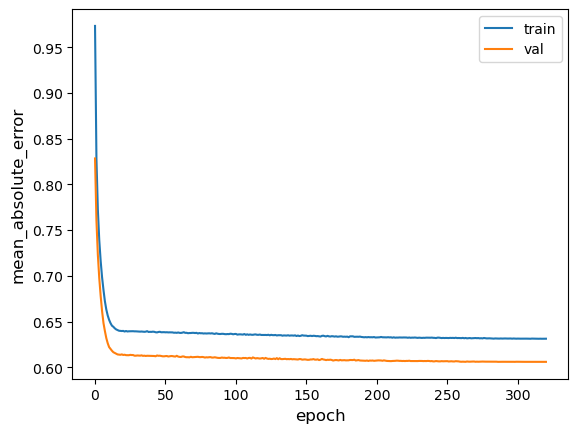

64/64 [==============================] - 0s 369us/step - loss: 0.7097 - mean_absolute_error: 0.6443
Test accuracy 0.6442859768867493
Test loss 0.7097340822219849


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

8.245041114341248

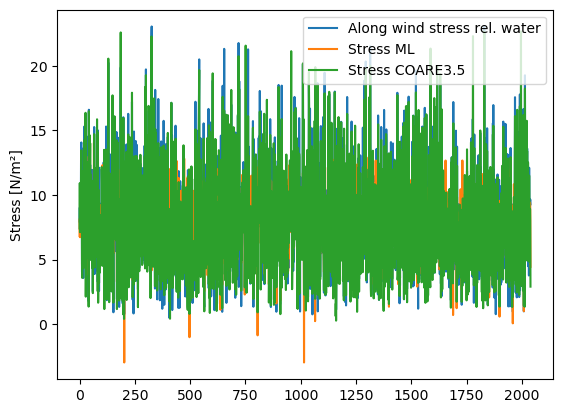

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

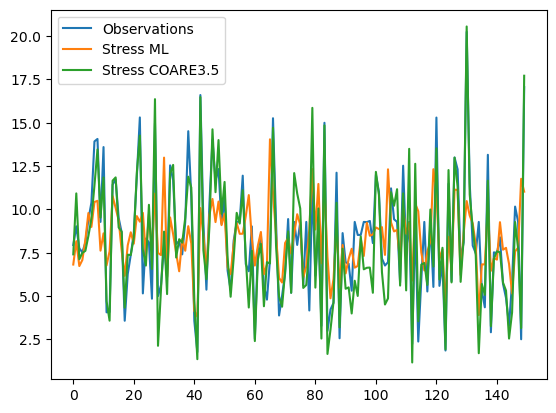

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

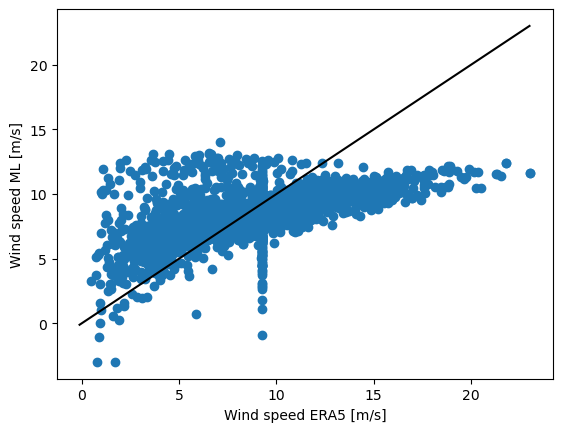

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

Text(0, 0.5, 'COARE [N/m²]')

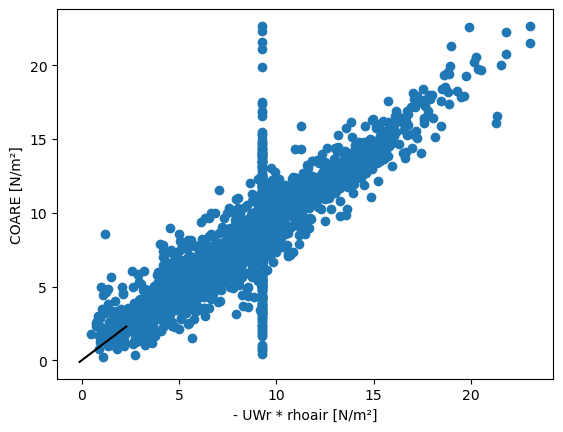

In [33]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [34]:
rmse(y_test.values, y_test_pred)

4.268870866909127

In [35]:
rmse(y_test.values, c_test)

1.9819281892327394

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.57059265],
       [0.57059265, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

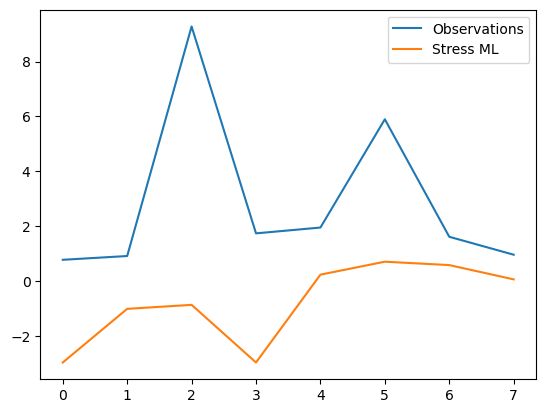

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.22595467],
       [0.22595467, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.       , 0.1087568],
       [0.1087568, 1.       ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

4.86194802719679

# Other experiments

In [42]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [43]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [44]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.4284 - mean_absolute_error: 0.9514 - val_loss: 0.7598 - val_mean_absolute_error: 0.6684
Epoch 2/500
179/179 [==============================] - 0s 805us/step - loss: 0.7655 - mean_absolute_error: 0.6658 - val_loss: 0.7444 - val_mean_absolute_error: 0.6667
Epoch 3/500
179/179 [==============================] - 0s 788us/step - loss: 0.7139 - mean_absolute_error: 0.6354 - val_loss: 0.7613 - val_mean_absolute_error: 0.6774
Epoch 4/500
179/179 [==============================] - 0s 748us/step - loss: 0.6985 - mean_absolute_error: 0.6342 - val_loss: 0.7858 - val_mean_absolute_error: 0.6873
Epoch 5/500
179/179 [==============================] - 0s 735us/step - loss: 0.6976 - mean_absolute_error: 0.6285 - val_loss: 0.7622 - val_mean_absolute_error: 0.6761
Epoch 6/500
179/179 [==============================] - 0s 733us/step - loss: 0.6902 - mean_absolute_error: 0.6266 - val_loss: 0.7821 - val_mean_absolute_error: 0.6867


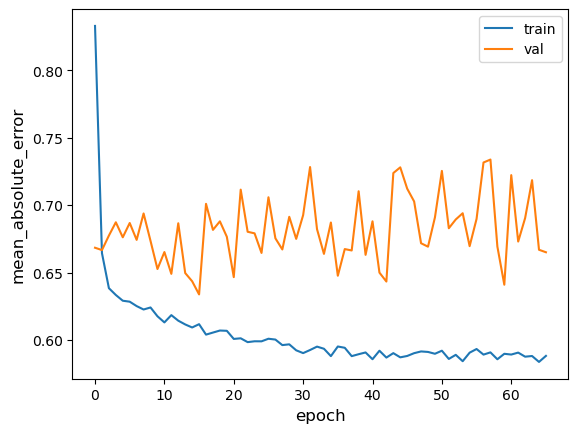

64/64 [==============================] - 0s 337us/step - loss: 0.9214 - mean_absolute_error: 0.7090
Test accuracy 0.7090002298355103
Test loss 0.9214298129081726


In [45]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [46]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

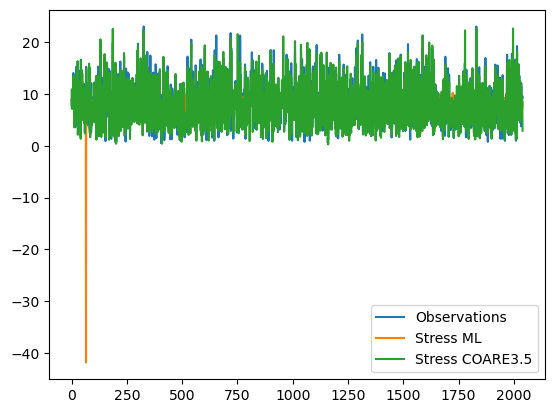

In [47]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

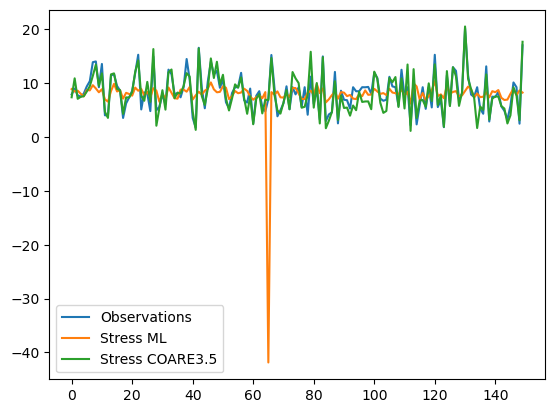

In [48]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [49]:
rmse(y_test.values, y_test_pred)

3.98769710362499

## Correlation

In [50]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.35362685],
       [0.35362685, 1.        ]])

In [51]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

In [52]:
y_test.values.shape

(2040,)

In [53]:
y_test_pred[:, 0].shape

(2040,)

In [54]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [55]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([7.94404041, 9.02161453, 7.75204424, ..., 9.49578491, 9.65031971,
       9.27715013])

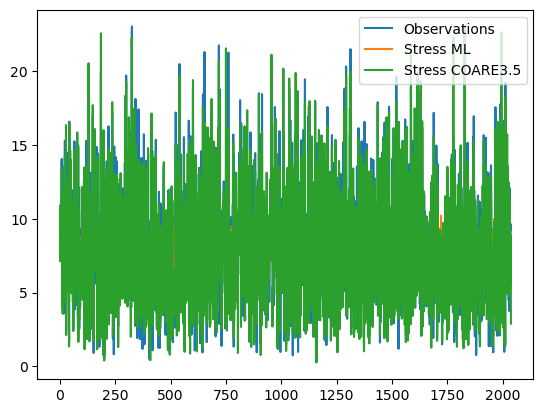

In [56]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

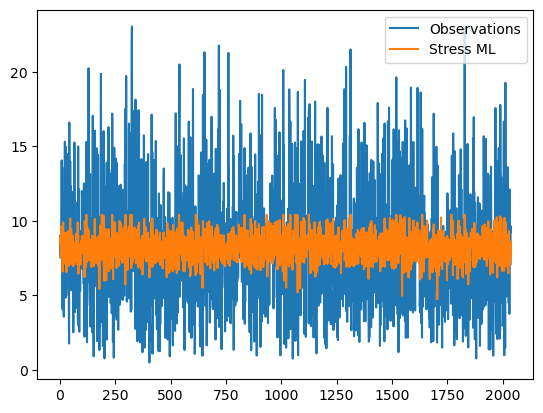

In [57]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [58]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.       , 0.8704033],
       [0.8704033, 1.       ]])

In [59]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

3.8311602369024764

Text(0, 0.5, 'Wind speed ML [m/s]')

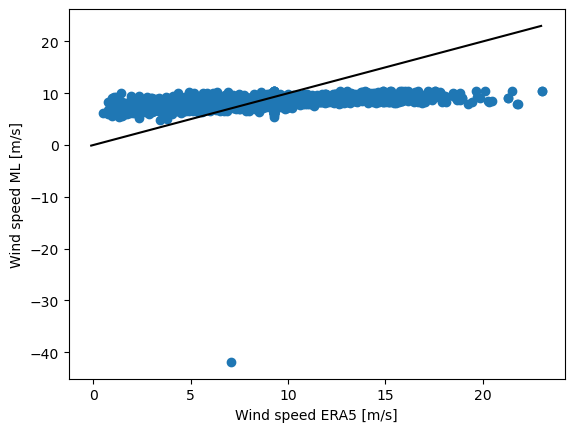

In [60]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [61]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [62]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [63]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 1.7075 - mean_absolute_error: 1.0230 - val_loss: 0.9895 - val_mean_absolute_error: 0.7928
Epoch 2/500
90/90 [==============================] - 0s 925us/step - loss: 1.2127 - mean_absolute_error: 0.8642 - val_loss: 0.8130 - val_mean_absolute_error: 0.7122
Epoch 3/500
90/90 [==============================] - 0s 919us/step - loss: 1.0042 - mean_absolute_error: 0.7843 - val_loss: 0.7407 - val_mean_absolute_error: 0.6741
Epoch 4/500
90/90 [==============================] - 0s 917us/step - loss: 0.8839 - mean_absolute_error: 0.7297 - val_loss: 0.6994 - val_mean_absolute_error: 0.6525
Epoch 5/500
90/90 [==============================] - 0s 885us/step - loss: 0.8336 - mean_absolute_error: 0.7069 - val_loss: 0.6769 - val_mean_absolute_error: 0.6405
Epoch 6/500
90/90 [==============================] - 0s 864us/step - loss: 0.8274 - mean_absolute_error: 0.6990 - val_loss: 0.6616 - val_mean_absolute_error: 0.6322
Epoch 7/500


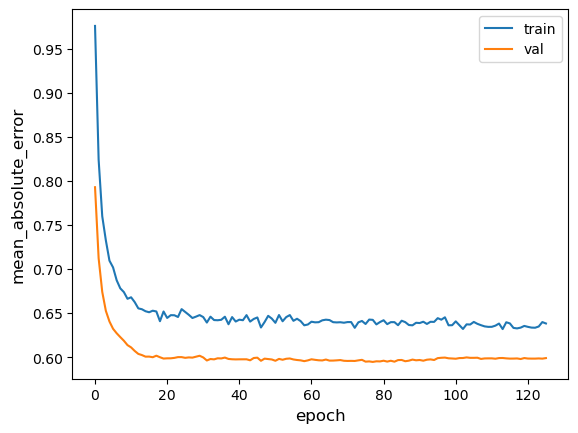

64/64 [==============================] - 0s 381us/step - loss: 0.6857 - mean_absolute_error: 0.6322
Test accuracy 0.632194459438324
Test loss 0.6856755614280701


In [64]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [65]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [66]:
rmse(y_test.values, y_test_pred)

4.100281653480329

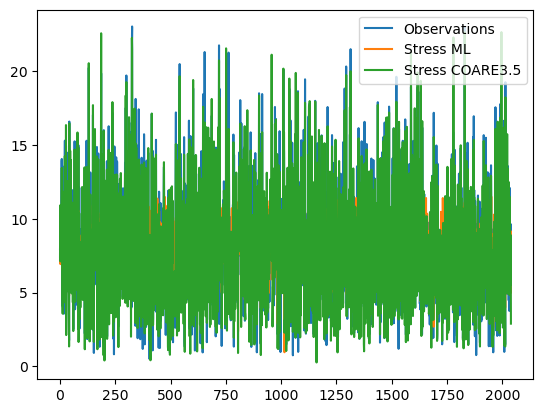

In [67]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

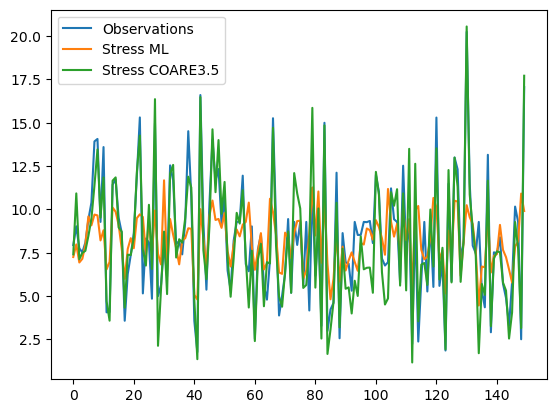

In [68]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

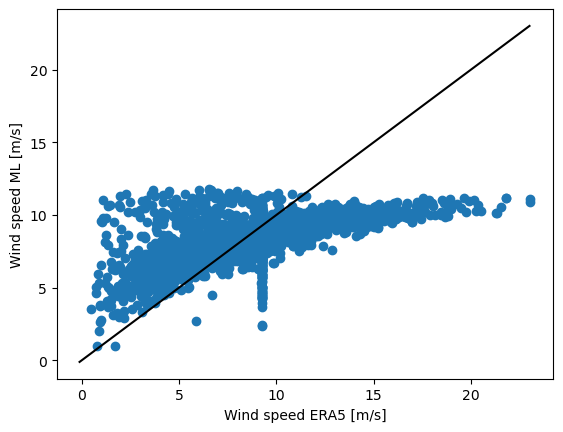

In [69]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [70]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.60941675],
       [0.60941675, 1.        ]])

In [71]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

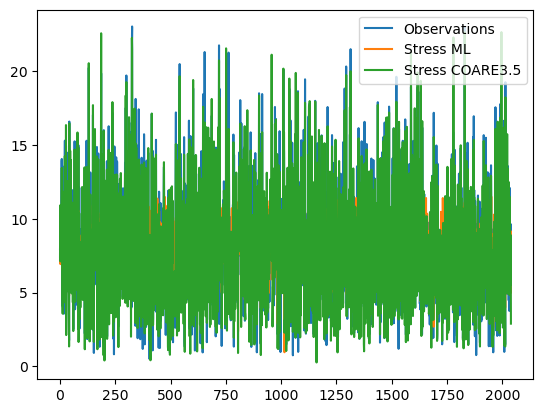

In [72]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

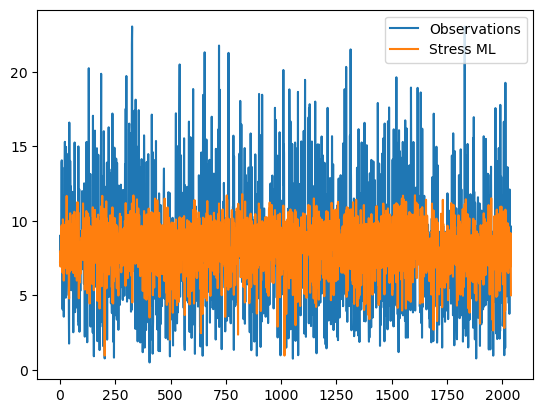

In [73]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [74]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

In [75]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.100281653480329

Text(0, 0.5, 'Wind speed ML [m/s]')

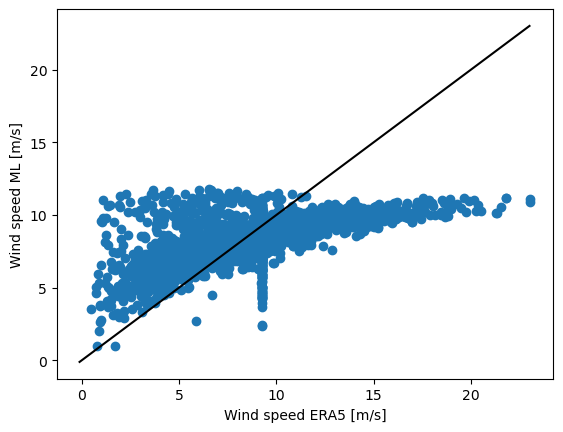

In [76]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [77]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [78]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [79]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.6383 - mean_absolute_error: 0.9975 - val_loss: 0.7983 - val_mean_absolute_error: 0.6991
Epoch 2/500
179/179 [==============================] - 0s 774us/step - loss: 1.0690 - mean_absolute_error: 0.7942 - val_loss: 0.7548 - val_mean_absolute_error: 0.6794
Epoch 3/500
179/179 [==============================] - 0s 752us/step - loss: 0.8974 - mean_absolute_error: 0.7342 - val_loss: 0.7479 - val_mean_absolute_error: 0.6761
Epoch 4/500
179/179 [==============================] - 0s 769us/step - loss: 0.8304 - mean_absolute_error: 0.7063 - val_loss: 0.7574 - val_mean_absolute_error: 0.6813
Epoch 5/500
179/179 [==============================] - 0s 767us/step - loss: 0.7641 - mean_absolute_error: 0.6729 - val_loss: 0.7220 - val_mean_absolute_error: 0.6641
Epoch 6/500
179/179 [==============================] - 0s 765us/step - loss: 0.7502 - mean_absolute_error: 0.6623 - val_loss: 0.7294 - val_mean_absolute_error: 0.6676


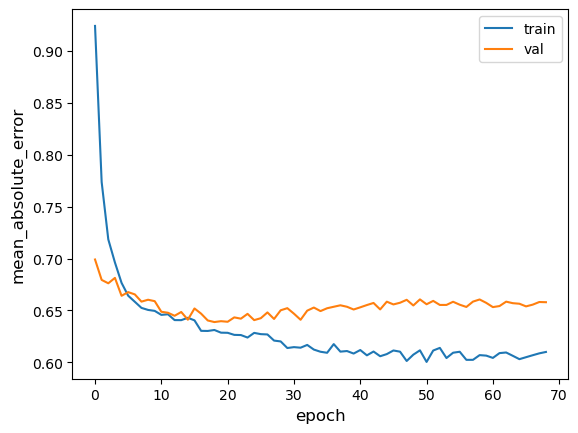

64/64 [==============================] - 0s 403us/step - loss: 0.8005 - mean_absolute_error: 0.6957
Test accuracy 0.6957347393035889
Test loss 0.8004825115203857


In [80]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [81]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [82]:
rmse(y_test.values, y_test_pred)

3.8473341203979157

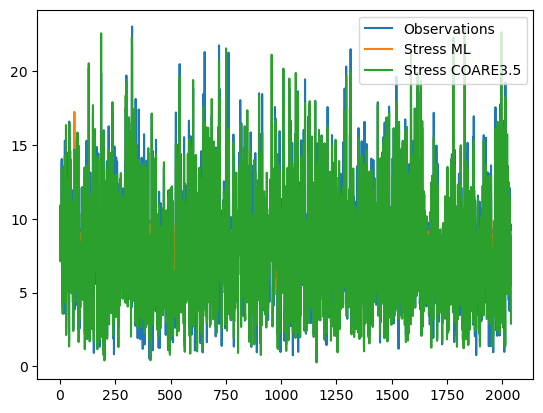

In [83]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

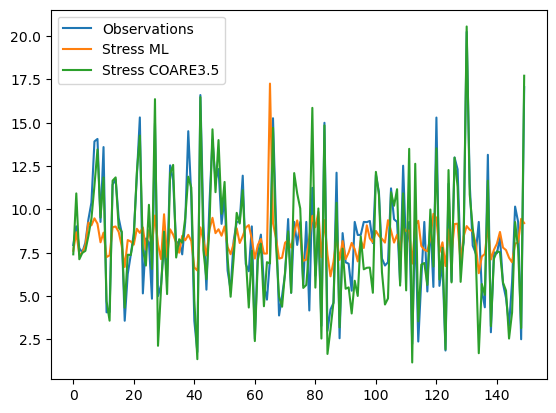

In [84]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

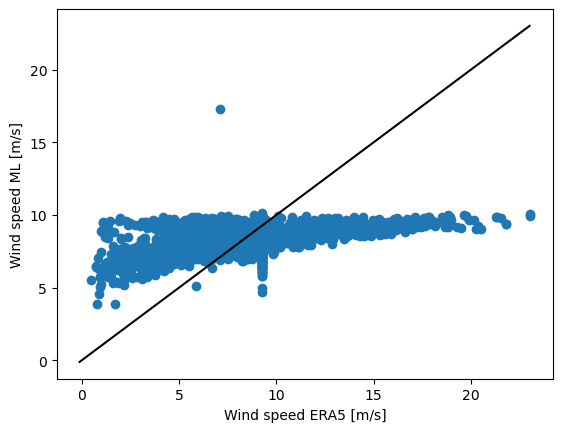

In [85]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [86]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.59679479],
       [0.59679479, 1.        ]])

In [87]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

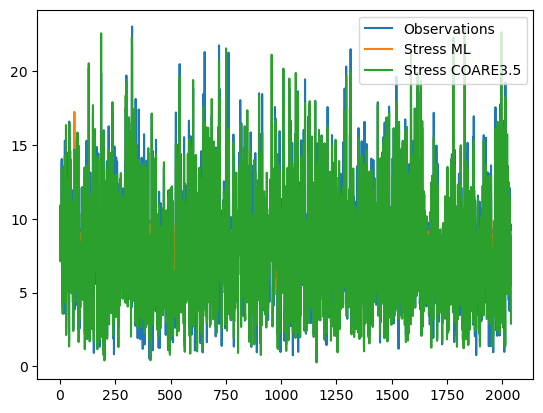

In [88]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

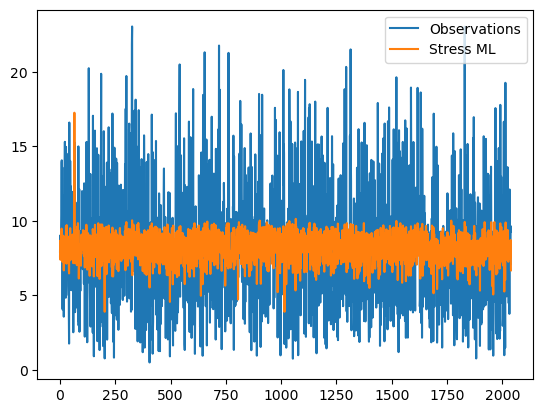

In [89]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [90]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

In [91]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

3.8473341203979157

Text(0, 0.5, 'Wind speed ML [m/s]')

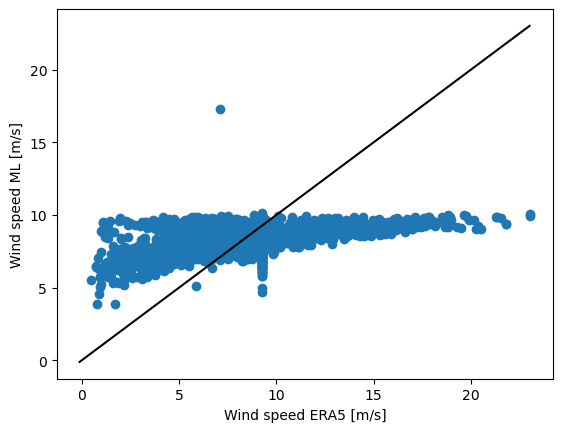

In [92]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [93]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [94]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [95]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 2ms/step - loss: 1.1815 - mean_absolute_error: 0.8488 - val_loss: 0.7413 - val_mean_absolute_error: 0.6682
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.8929 - mean_absolute_error: 0.7271 - val_loss: 0.6767 - val_mean_absolute_error: 0.6375
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 0.7961 - mean_absolute_error: 0.6895 - val_loss: 0.6545 - val_mean_absolute_error: 0.6242
Epoch 4/500
179/179 [==============================] - 0s 1ms/step - loss: 0.7252 - mean_absolute_error: 0.6548 - val_loss: 0.6404 - val_mean_absolute_error: 0.6144
Epoch 5/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6886 - mean_absolute_error: 0.6352 - val_loss: 0.6675 - val_mean_absolute_error: 0.6273
Epoch 6/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6519 - mean_absolute_error: 0.6078 - val_loss: 0.6593 - val_mean_absolute_error: 0.6250
Epoch 7/50

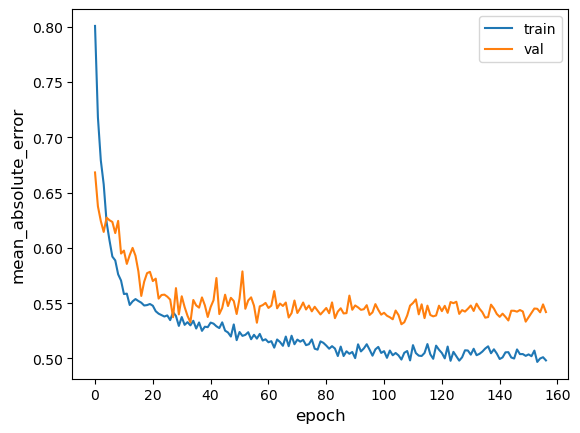

64/64 [==============================] - 0s 422us/step - loss: 0.6283 - mean_absolute_error: 0.5908
Test accuracy 0.5907812118530273
Test loss 0.6282734870910645


In [96]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [97]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [98]:
rmse(y_test.values, y_test_pred)

4.2664171380458376

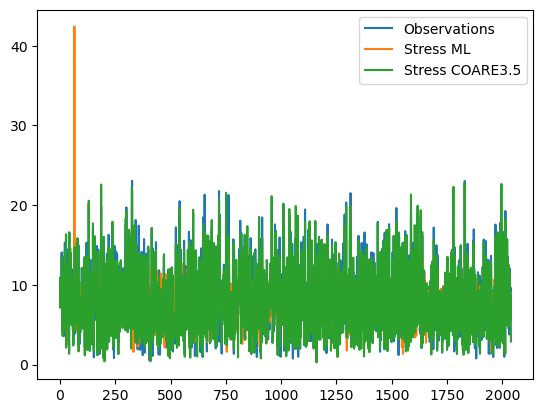

In [99]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

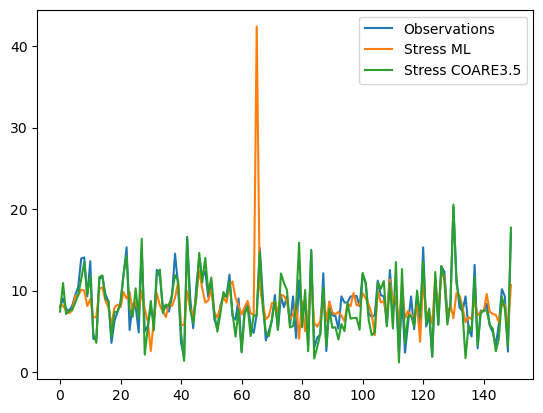

In [100]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Wind speed ML [m/s]')

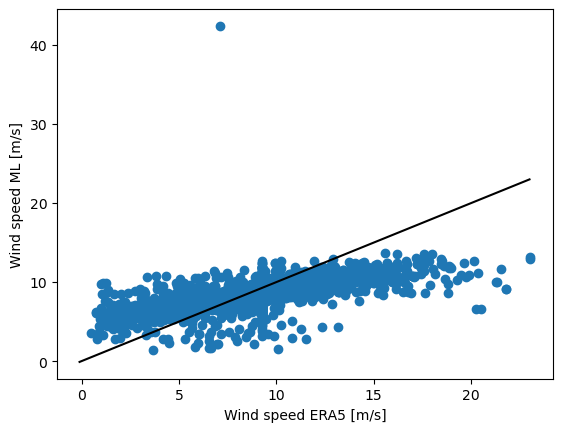

In [101]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [102]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64058567],
       [0.64058567, 1.        ]])

In [103]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

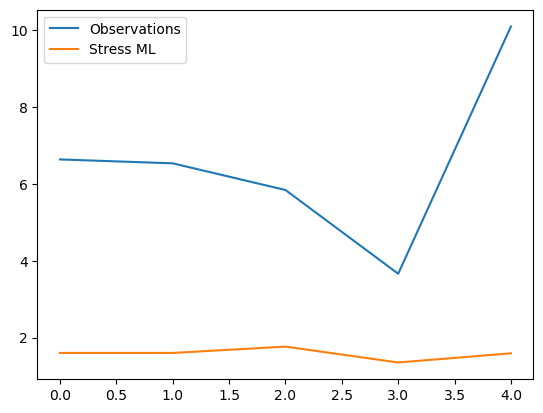

In [104]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [105]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.89441818],
       [0.89441818, 1.        ]])

In [106]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

5.032671605982764

Text(0, 0.5, 'Wind speed ML [m/s]')

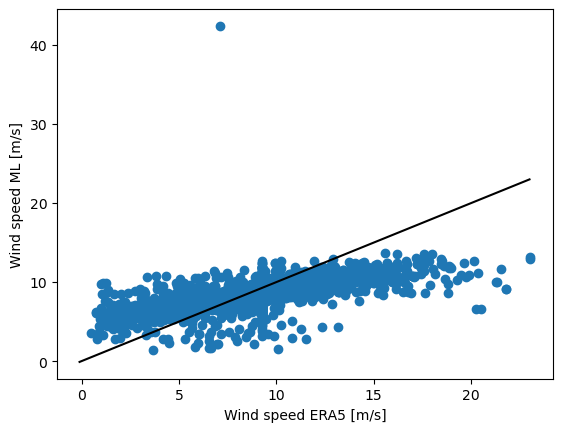

In [107]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

## Correlation

In [108]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64058567],
       [0.64058567, 1.        ]])

In [109]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

In [110]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [111]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [112]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 5ms/step - loss: 2.8621 - mean_absolute_error: 1.2424 - val_loss: 0.8818 - val_mean_absolute_error: 0.7285
Epoch 2/500
179/179 [==============================] - 1s 4ms/step - loss: 1.1197 - mean_absolute_error: 0.8019 - val_loss: 0.7234 - val_mean_absolute_error: 0.6639
Epoch 3/500
179/179 [==============================] - 1s 4ms/step - loss: 0.8747 - mean_absolute_error: 0.7235 - val_loss: 0.6310 - val_mean_absolute_error: 0.6187
Epoch 4/500
179/179 [==============================] - 1s 4ms/step - loss: 0.7881 - mean_absolute_error: 0.6770 - val_loss: 0.6028 - val_mean_absolute_error: 0.6058
Epoch 5/500
179/179 [==============================] - 1s 4ms/step - loss: 0.7120 - mean_absolute_error: 0.6469 - val_loss: 0.5774 - val_mean_absolute_error: 0.5891
Epoch 6/500
179/179 [==============================] - 1s 4ms/step - loss: 0.7050 - mean_absolute_error: 0.6392 - val_loss: 0.7352 - val_mean_absolute_error: 0.6616
Epoch 7/50

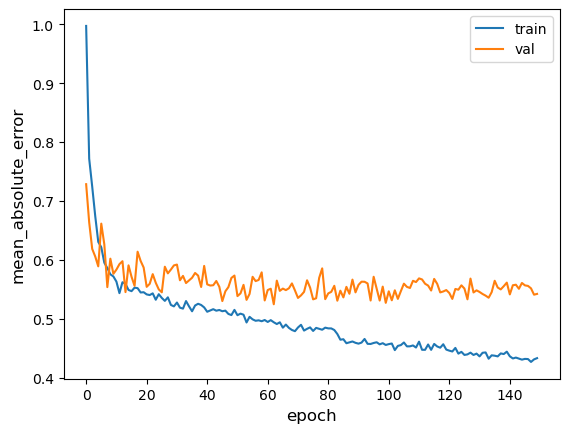

64/64 [==============================] - 0s 757us/step - loss: 0.5681 - mean_absolute_error: 0.5805
Test accuracy 0.5805479884147644
Test loss 0.5680800676345825


In [113]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [114]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [115]:
rmse(y_test.values, y_test_pred)

4.1677254811199065

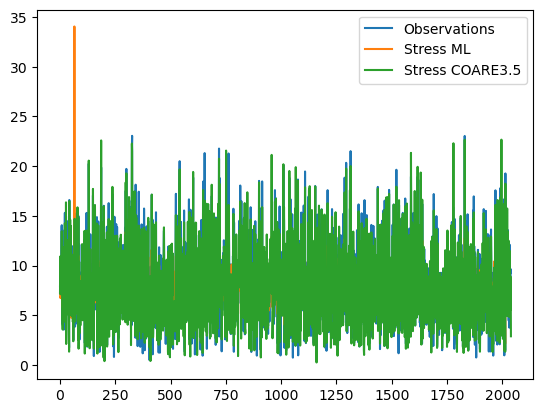

In [116]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

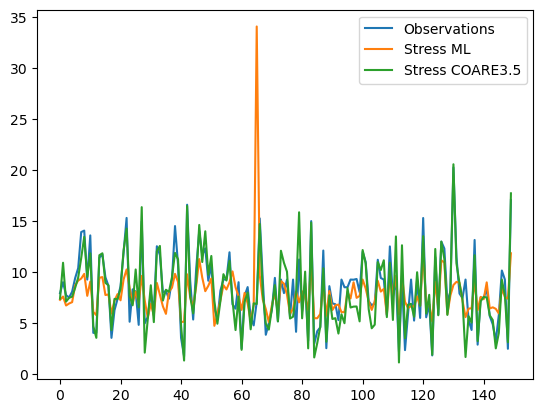

In [117]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [118]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73188026],
       [0.73188026, 1.        ]])

In [119]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

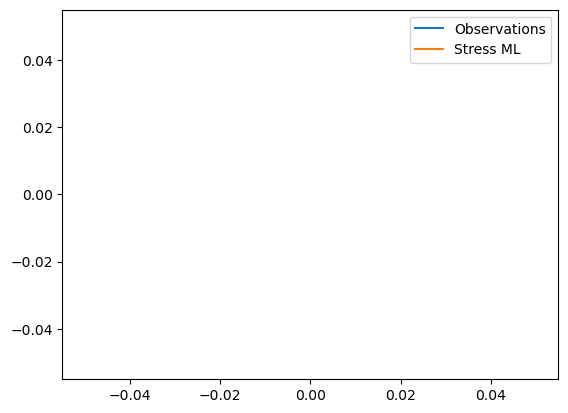

In [120]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [121]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

In [122]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

/tmp/ipykernel_842313/3670251522.py:2: RuntimeWarning: Mean of empty slice
  return np.sqrt(np.nanmean((y_true - y_pred)**2))


nan

Text(0, 0.5, 'Wind speed ML [m/s]')

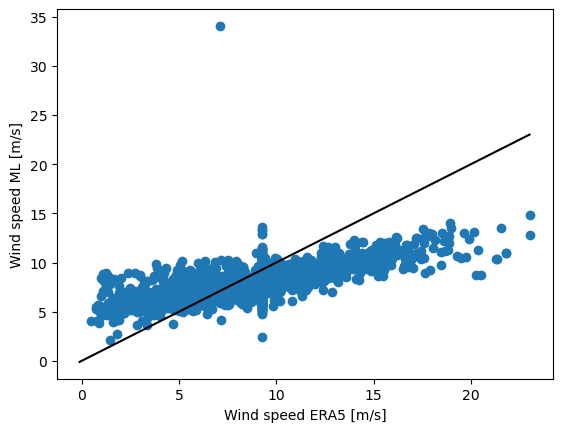

In [123]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [124]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [125]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [126]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 12ms/step - loss: 4.8013 - mean_absolute_error: 1.4054 - val_loss: 0.9094 - val_mean_absolute_error: 0.7460
Epoch 2/500
179/179 [==============================] - 2s 11ms/step - loss: 1.1502 - mean_absolute_error: 0.8345 - val_loss: 0.8626 - val_mean_absolute_error: 0.7227
Epoch 3/500
179/179 [==============================] - 2s 11ms/step - loss: 0.9226 - mean_absolute_error: 0.7440 - val_loss: 0.6379 - val_mean_absolute_error: 0.6178
Epoch 4/500
179/179 [==============================] - 2s 11ms/step - loss: 0.8339 - mean_absolute_error: 0.7030 - val_loss: 0.6011 - val_mean_absolute_error: 0.5962
Epoch 5/500
179/179 [==============================] - 2s 11ms/step - loss: 0.7659 - mean_absolute_error: 0.6742 - val_loss: 0.5882 - val_mean_absolute_error: 0.5961
Epoch 6/500
179/179 [==============================] - 2s 12ms/step - loss: 0.7471 - mean_absolute_error: 0.6689 - val_loss: 0.5421 - val_mean_absolute_error: 0.5629
Epoc

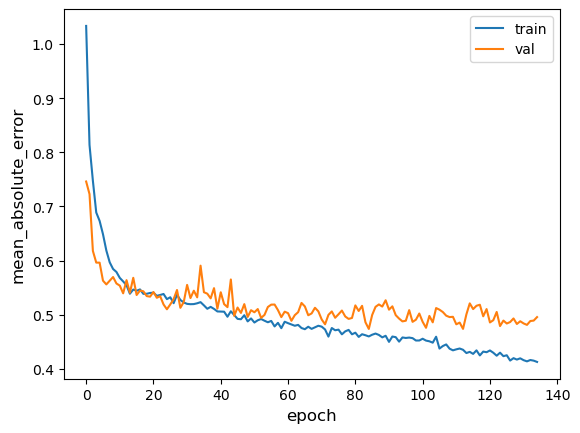

64/64 [==============================] - 0s 2ms/step - loss: 0.4670 - mean_absolute_error: 0.5246
Test accuracy 0.5245875716209412
Test loss 0.46700888872146606


In [127]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [128]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [129]:
rmse(y_test.values, y_test_pred)

4.440083254002554

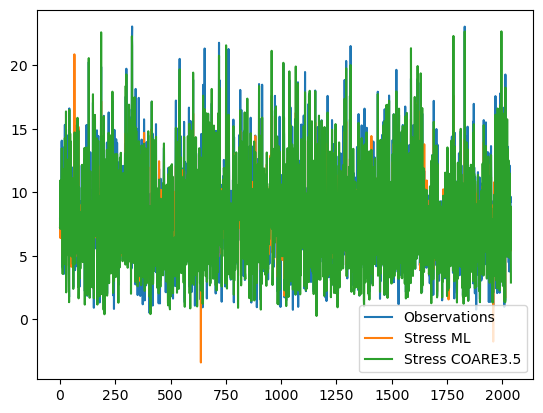

In [130]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

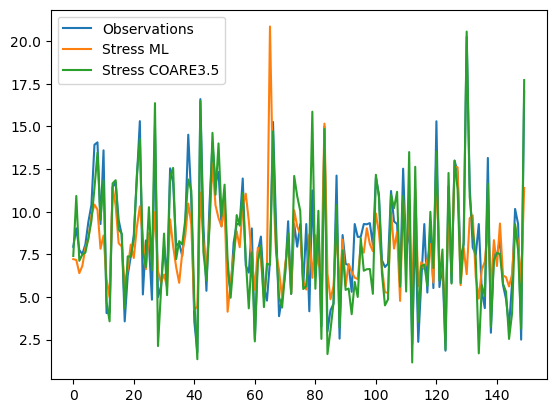

In [131]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [132]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.75950522],
       [0.75950522, 1.        ]])

In [133]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

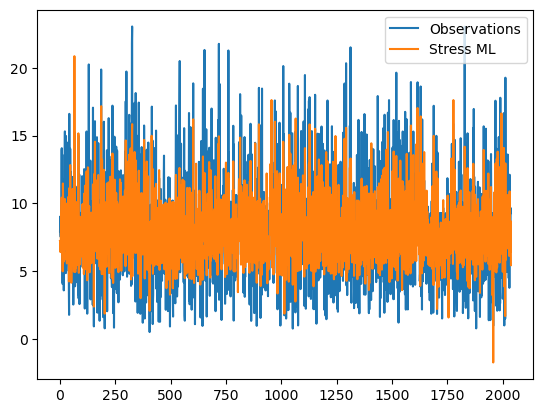

In [134]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [135]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.87106723],
       [0.87106723, 1.        ]])

In [136]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.4335945642083425

Text(0, 0.5, 'Wind speed ML [m/s]')

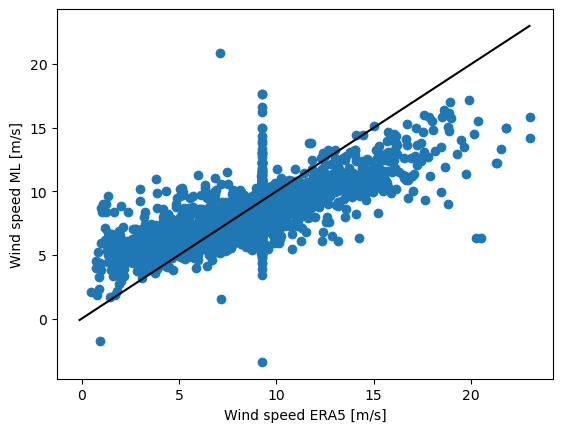

In [137]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

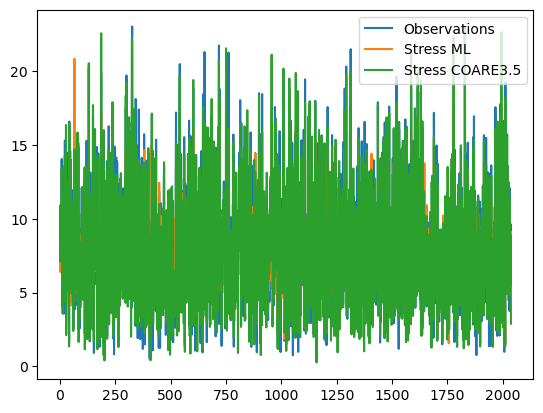

In [138]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

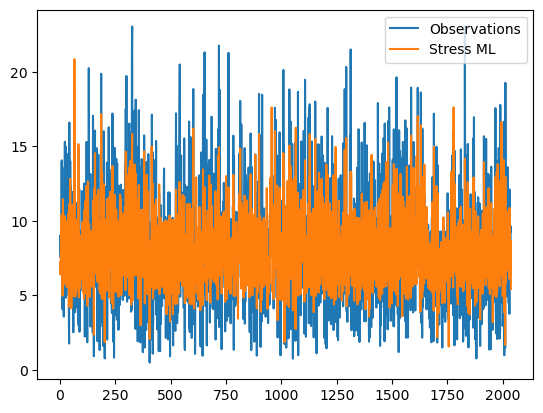

In [139]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [140]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.76430207],
       [0.76430207, 1.        ]])

In [141]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.87092908],
       [0.87092908, 1.        ]])

In [142]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

4.426450818572565

Text(0, 0.5, 'Wind speed ML [m/s]')

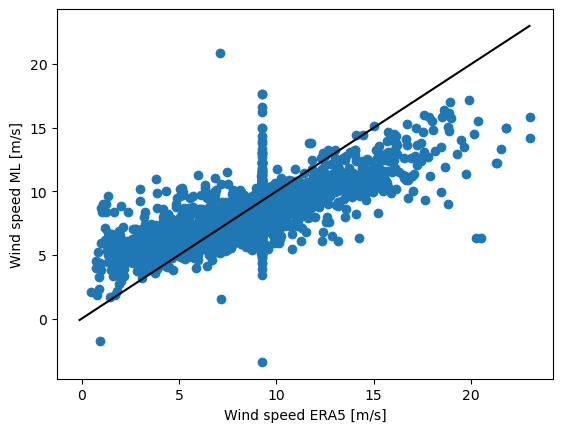

In [143]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [144]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [145]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [146]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 38ms/step - loss: 22.4416 - mean_absolute_error: 3.0058 - val_loss: 0.8844 - val_mean_absolute_error: 0.7354
Epoch 2/500
12/12 [==============================] - 0s 29ms/step - loss: 1.9670 - mean_absolute_error: 1.0862 - val_loss: 0.8799 - val_mean_absolute_error: 0.7300
Epoch 3/500
12/12 [==============================] - 0s 28ms/step - loss: 1.3261 - mean_absolute_error: 0.8828 - val_loss: 0.9071 - val_mean_absolute_error: 0.7397
Epoch 4/500
12/12 [==============================] - 0s 29ms/step - loss: 1.1827 - mean_absolute_error: 0.8277 - val_loss: 0.8865 - val_mean_absolute_error: 0.7348
Epoch 5/500
12/12 [==============================] - 0s 29ms/step - loss: 1.1804 - mean_absolute_error: 0.8351 - val_loss: 0.8912 - val_mean_absolute_error: 0.7350
Epoch 6/500
12/12 [==============================] - 0s 28ms/step - loss: 1.1512 - mean_absolute_error: 0.8332 - val_loss: 0.9186 - val_mean_absolute_error: 0.7430
Epoch 7/500
12/

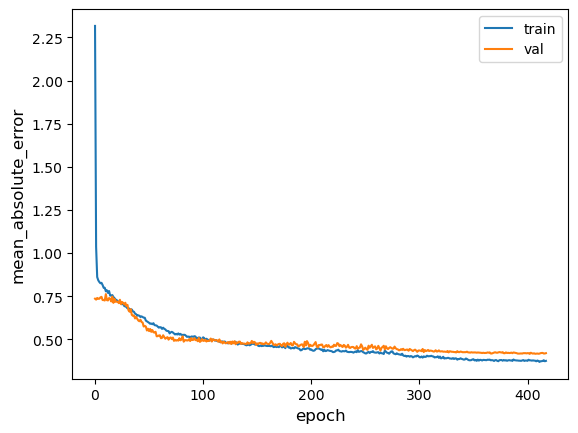

64/64 [==============================] - 0s 2ms/step - loss: 0.3418 - mean_absolute_error: 0.4391
Test accuracy 0.4391152560710907
Test loss 0.3418447971343994


In [147]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [148]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [149]:
rmse(y_test.values, y_test_pred)

4.693257563837416

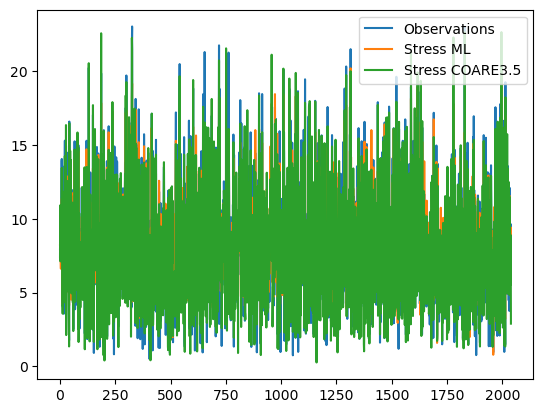

In [150]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

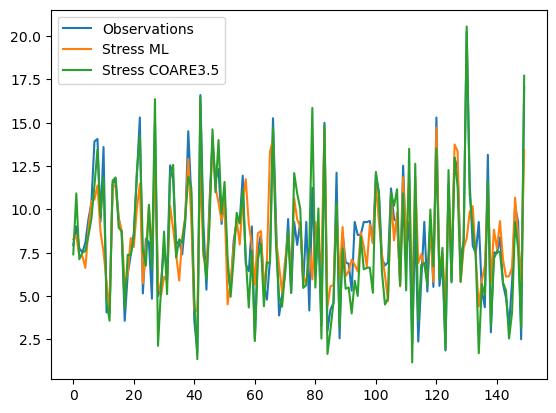

In [151]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [152]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.82412261],
       [0.82412261, 1.        ]])

In [153]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

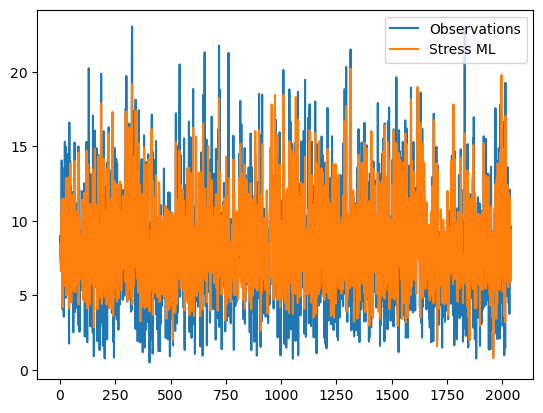

In [154]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [155]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

In [156]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.693257563837416

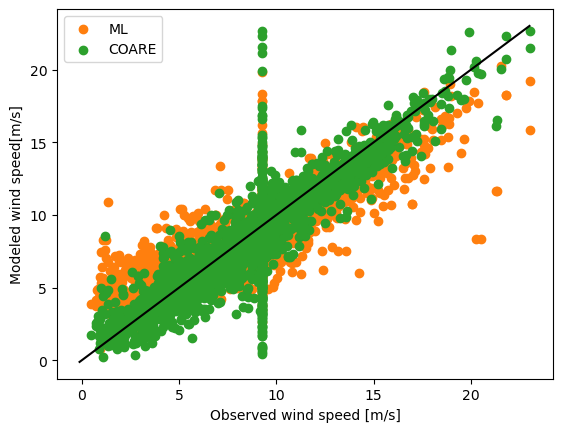

In [157]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed[m/s]') 
plt.legend()

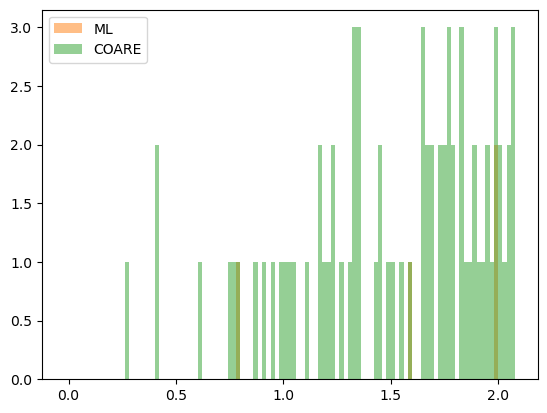

In [158]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [159]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [160]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [161]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 39ms/step - loss: 21.9914 - mean_absolute_error: 3.1720 - val_loss: 0.8943 - val_mean_absolute_error: 0.7419
Epoch 2/500
12/12 [==============================] - 0s 30ms/step - loss: 2.0688 - mean_absolute_error: 1.0777 - val_loss: 0.9268 - val_mean_absolute_error: 0.7571
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 1.6028 - mean_absolute_error: 0.9686 - val_loss: 0.9659 - val_mean_absolute_error: 0.7693
Epoch 4/500
12/12 [==============================] - 0s 30ms/step - loss: 1.2892 - mean_absolute_error: 0.8588 - val_loss: 1.0323 - val_mean_absolute_error: 0.7944
Epoch 5/500
12/12 [==============================] - 0s 30ms/step - loss: 1.2309 - mean_absolute_error: 0.8414 - val_loss: 0.9911 - val_mean_absolute_error: 0.7788
Epoch 6/500
12/12 [==============================] - 0s 29ms/step - loss: 1.2040 - mean_absolute_error: 0.8240 - val_loss: 1.1230 - val_mean_absolute_error: 0.8290
Epoch 7/500
12/

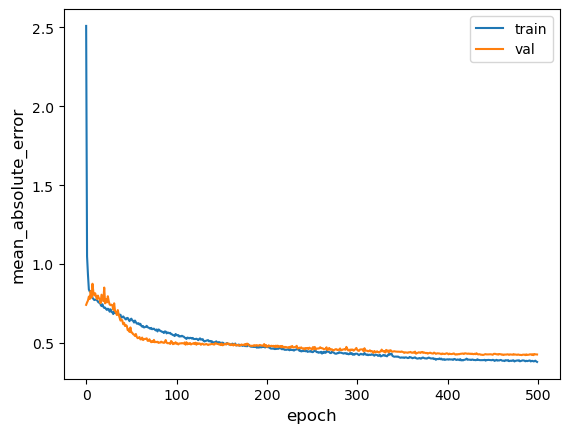

64/64 [==============================] - 0s 2ms/step - loss: 0.3520 - mean_absolute_error: 0.4469
Test accuracy 0.44689643383026123
Test loss 0.352023184299469


In [162]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [163]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [164]:
rmse(y_test.values, y_test_pred)

4.670617963220985

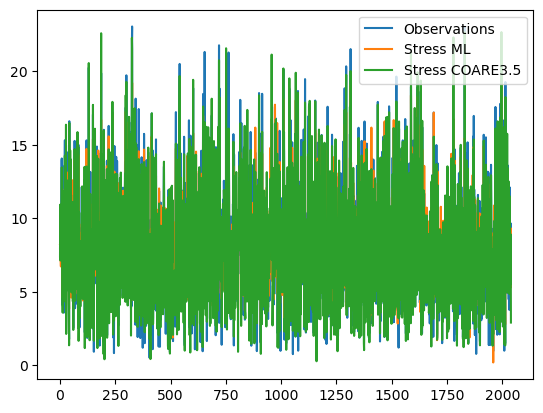

In [165]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

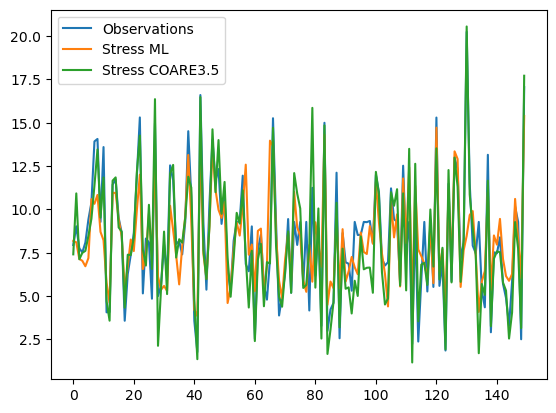

In [166]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [167]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81817588],
       [0.81817588, 1.        ]])

In [168]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

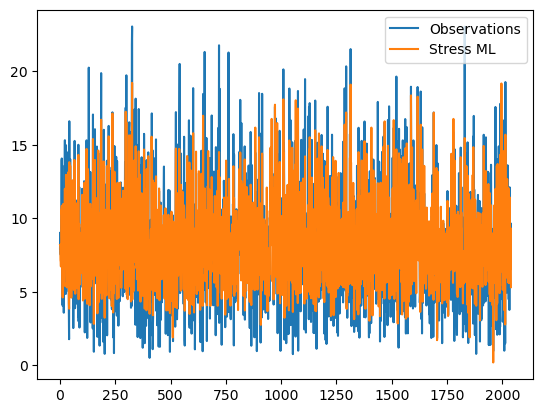

In [169]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [170]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.87040845],
       [0.87040845, 1.        ]])

In [171]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

4.670617963220985

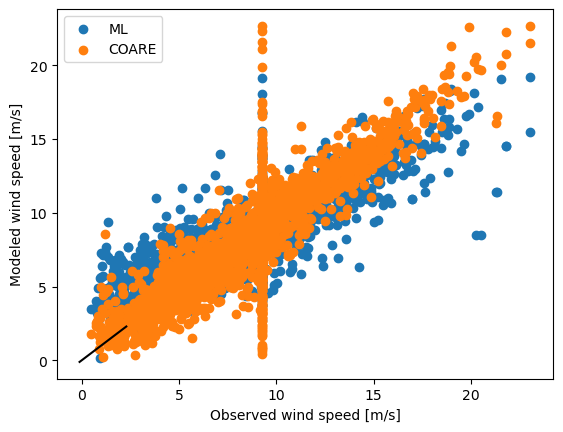

In [172]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.legend()

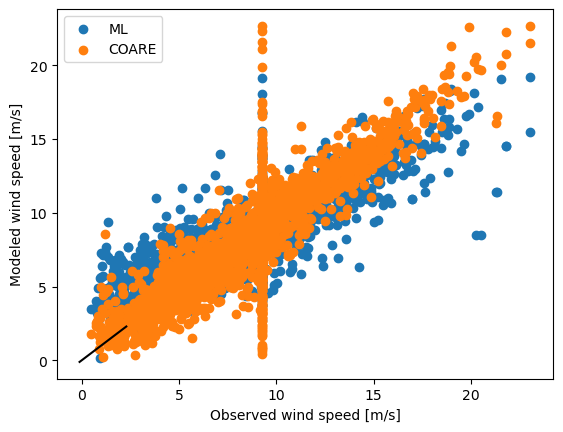

In [173]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.legend()

In [174]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [175]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 133ms/step - loss: 21.3635 - mean_absolute_error: 2.9525 - val_loss: 0.9190 - val_mean_absolute_error: 0.7488
Epoch 2/500
6/6 [==============================] - 1s 110ms/step - loss: 2.1025 - mean_absolute_error: 1.1381 - val_loss: 0.8644 - val_mean_absolute_error: 0.7255
Epoch 3/500
6/6 [==============================] - 1s 109ms/step - loss: 1.6526 - mean_absolute_error: 0.9834 - val_loss: 0.8856 - val_mean_absolute_error: 0.7332
Epoch 4/500
6/6 [==============================] - 1s 108ms/step - loss: 1.4456 - mean_absolute_error: 0.9083 - val_loss: 0.8378 - val_mean_absolute_error: 0.7162
Epoch 5/500
6/6 [==============================] - 1s 109ms/step - loss: 1.3171 - mean_absolute_error: 0.8728 - val_loss: 0.8461 - val_mean_absolute_error: 0.7168
Epoch 6/500
6/6 [==============================] - 1s 107ms/step - loss: 1.3028 - mean_absolute_error: 0.8703 - val_loss: 0.8558 - val_mean_absolute_error: 0.7216
Epoch 7/500
6/6 [====

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

In [ ]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

In [ ]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

In [ ]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 23], [-0.1, 23], color='k')
plt.xlabel('Wind speed ERA5 [m/s]') 
plt.ylabel('Wind speed ML [m/s]') 

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

In [ ]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 